In [1]:
import pandas as pd
import keras
import numpy as np
!pip install dill
import dill

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.4 MB/s eta 0:00:00


In [2]:
!gdown 108Rg2FdrnQuh2O_klrQWalZI7orvN5fj
df = pd.read_excel("/content/Diagnostics.xlsx")
df.head()

Downloading...
From: https://drive.google.com/uc?id=108Rg2FdrnQuh2O_klrQWalZI7orvN5fj
To: /content/Diagnostics.xlsx
100% 832k/832k [00:00<00:00, 52.0MB/s]


FileName Rhythm       Beat  PatientAge  Gender  \
0  MUSE_20180113_171327_27000   AFIB   RBBB TWC          85    MALE   
1  MUSE_20180112_073319_29000     SB        TWC          59  FEMALE   
2  MUSE_20180111_165520_97000     SA       NONE          20  FEMALE   
3  MUSE_20180113_121940_44000     SB       NONE          66    MALE   
4  MUSE_20180112_122850_57000     AF  STDD STTC          73  FEMALE   

   VentricularRate  AtrialRate  QRSDuration  QTInterval  QTCorrected  RAxis  \
0              117         234          114         356          496     81   
1               52          52           92         432          401     76   
2               67          67           82         382          403     88   
3               53          53           96         456          427     34   
4              162         162          114         252          413     68   

   TAxis  QRSCount  QOnset  QOffset  TOffset  
0    -27        19     208      265      386  
1     42         8     215      261      431  
2     20        11     224      265      415  
3      3         9     219      267      447  
4    -40        26     228      285      354

In [3]:
df_1 = df.drop(columns=['FileName','Beat']) # classification report and confusion matrix, AUC
df_1

Rhythm  PatientAge  Gender  VentricularRate  AtrialRate  QRSDuration  \
0       AFIB          85    MALE              117         234          114   
1         SB          59  FEMALE               52          52           92   
2         SA          20  FEMALE               67          67           82   
3         SB          66    MALE               53          53           96   
4         AF          73  FEMALE              162         162          114   
...      ...         ...     ...              ...         ...          ...   
10641    SVT          80  FEMALE              196          73          168   
10642    SVT          81  FEMALE              162          81          162   
10643    SVT          39    MALE              152          92          152   
10644    SVT          76    MALE              175         178          128   
10645    SVT          75    MALE              117         104          140   

       QTInterval  QTCorrected  RAxis  TAxis  QRSCount  QOnset  QOffset  \
0             356          496     81    -27        19     208      265   
1             432          401     76     42         8     215      261   
2             382          403     88     20        11     224      265   
3             456          427     34      3         9     219      267   
4             252          413     68    -40        26     228      285   
...           ...          ...    ...    ...       ...     ...      ...   
10641         284          513    258    244        32     177      261   
10642         294          482    110    -75        27     173      254   
10643         340          540    250     38        25     208      284   
10644         310          529     98    -83        29     205      269   
10645         312          435    263    144        19     208      278   

       TOffset  
0          386  
1          431  
2          415  
3          447  
4          354  
...        ...  
10641      319  
10642      320  
10643      378  
10644      360  
10645      364  

[10646 rows x 14 columns]

In [4]:
df_1['Rhythm'] = df['Rhythm'].replace({"AF":0, "AFIB":0, "SVT":1, "AT":1, "SAAWR":1, "ST":1,
"AVNRT":1, "AVRT":1, "SB":2, "SA":3, "SR":3})
df_1

<ipython-input-4-1cbd04af9b7c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1['Rhythm'] = df['Rhythm'].replace({"AF":0, "AFIB":0, "SVT":1, "AT":1, "SAAWR":1, "ST":1,


Rhythm  PatientAge  Gender  VentricularRate  AtrialRate  QRSDuration  \
0           0          85    MALE              117         234          114   
1           2          59  FEMALE               52          52           92   
2           3          20  FEMALE               67          67           82   
3           2          66    MALE               53          53           96   
4           0          73  FEMALE              162         162          114   
...       ...         ...     ...              ...         ...          ...   
10641       1          80  FEMALE              196          73          168   
10642       1          81  FEMALE              162          81          162   
10643       1          39    MALE              152          92          152   
10644       1          76    MALE              175         178          128   
10645       1          75    MALE              117         104          140   

       QTInterval  QTCorrected  RAxis  TAxis  QRSCount  QOnset  QOffset  \
0             356          496     81    -27        19     208      265   
1             432          401     76     42         8     215      261   
2             382          403     88     20        11     224      265   
3             456          427     34      3         9     219      267   
4             252          413     68    -40        26     228      285   
...           ...          ...    ...    ...       ...     ...      ...   
10641         284          513    258    244        32     177      261   
10642         294          482    110    -75        27     173      254   
10643         340          540    250     38        25     208      284   
10644         310          529     98    -83        29     205      269   
10645         312          435    263    144        19     208      278   

       TOffset  
0          386  
1          431  
2          415  
3          447  
4          354  
...        ...  
10641      319  
10642      320  
10643      378  
10644      360  
10645      364  

[10646 rows x 14 columns]

In [5]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

encoder = OneHotEncoder(sparse_output=False)

one_hot = encoder.fit_transform(df_1[['Gender']])

df_encoded = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(['Gender']))

# Concatenazione con il DataFrame originale
df_1 = pd.concat([df_1, df_encoded], axis=1)

df_1 = df_1.drop(columns=['Gender', "Gender_FEMALE"])

df_1

Rhythm  PatientAge  VentricularRate  AtrialRate  QRSDuration  \
0           0          85              117         234          114   
1           2          59               52          52           92   
2           3          20               67          67           82   
3           2          66               53          53           96   
4           0          73              162         162          114   
...       ...         ...              ...         ...          ...   
10641       1          80              196          73          168   
10642       1          81              162          81          162   
10643       1          39              152          92          152   
10644       1          76              175         178          128   
10645       1          75              117         104          140   

       QTInterval  QTCorrected  RAxis  TAxis  QRSCount  QOnset  QOffset  \
0             356          496     81    -27        19     208      265   
1             432          401     76     42         8     215      261   
2             382          403     88     20        11     224      265   
3             456          427     34      3         9     219      267   
4             252          413     68    -40        26     228      285   
...           ...          ...    ...    ...       ...     ...      ...   
10641         284          513    258    244        32     177      261   
10642         294          482    110    -75        27     173      254   
10643         340          540    250     38        25     208      284   
10644         310          529     98    -83        29     205      269   
10645         312          435    263    144        19     208      278   

       TOffset  Gender_MALE  
0          386          1.0  
1          431          0.0  
2          415          0.0  
3          447          1.0  
4          354          0.0  
...        ...          ...  
10641      319          0.0  
10642      320          0.0  
10643      378          1.0  
10644      360          1.0  
10645      364          1.0  

[10646 rows x 14 columns]

In [6]:
from sklearn.model_selection import train_test_split

X = df_1.drop(columns=["Rhythm"])
y = df_1["Rhythm"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3, # train:test ratio 7:3
                                                    stratify=y, # grants equal labels division
                                                    random_state = 13)


In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X_train)

X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns, index=X_train.index)  # Keep original columns and index

In [8]:
X_scaled_test = scaler.transform(X_test)
# Convert the scaled NumPy array back to a pandas DataFrame
X_scaled_test = pd.DataFrame(X_scaled_test, columns=X_test.columns, index=X_test.index)

In [9]:
X_scaled.shape

(7452, 13)

In [10]:
import tensorflow as tf
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score

def create_model(nhid1=100,
                 nhid2=50,
                 num_layers=2,
                 learning_rate=0.001,
                 dropout_rate=0,
                 hid_act='leaky_relu',
                 loss='sparse_categorical_crossentropy'):

    model = Sequential()
    model.add(Dense(nhid1, input_shape=(13,), activation=hid_act))
    for _ in range(num_layers - 1):
        model.add(BatchNormalization())
        model.add(Dense(nhid2, activation=hid_act))
        model.add(Dropout(dropout_rate))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=loss)

    return model

In [11]:
from sklearn.metrics import accuracy_score

# Sanity Check
model = create_model()
model.fit(X_scaled, y_train, epochs=10, batch_size=16, verbose=0)

pred = model.predict(X_scaled_test)
pred_labels = np.argmax(pred, axis=1)
acc = accuracy_score(y_test, pred_labels)

print(acc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.8384470882905448


In [12]:
import tensorflow as tf
if len(tf.config.list_physical_devices('GPU')) == 0:
  raise SystemError('GPU device not found')


In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import warnings
import itertools
import numpy as np

warnings.filterwarnings('ignore')

nhid1 = [75, 100]
nhid2 = [50, 25]
num_layers = [3, 4]
lr = [10**-4, 10**-3]
batch_size = [16, 32]
dropout_rate = [0.1, 0.2]

k_folds = 2

max_f1_score = -1
max_f1_model_config = None

for n_units, n_units2, layers, batches, l_rates, d_rates in itertools.product(nhid1, nhid2, num_layers, batch_size, lr, dropout_rate):

    fold_f1_scores = []
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=13)

    for train_index, val_index in kf.split(X_scaled):
        X_train_fold, X_val_fold = X_scaled.iloc[train_index], X_scaled.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model = create_model(n_units, n_units2, layers, l_rates, d_rates, hid_act='relu', loss='sparse_categorical_crossentropy')
        model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=batches, verbose=0)

        pred = model.predict(X_val_fold)
        pred_labels = np.argmax(pred, axis=1)

        f1_macro = f1_score(y_val_fold, pred_labels, average='macro')
        fold_f1_scores.append(f1_macro)

    mean_f1_score = np.mean(fold_f1_scores)
    print(f"Configuration: (n_units, n_units2, layers, l_rates, d_rates, batches): "
          f"{(n_units, n_units2, layers, l_rates, d_rates, batches)} -> mean F1-macro score: {mean_f1_score}")

    if mean_f1_score > max_f1_score:
        max_f1_score = mean_f1_score
        max_f1_model_config = (n_units, n_units2, layers, l_rates, d_rates, batches)

print(f"Max mean F1-macro score: {max_f1_score} with configuration {max_f1_model_config}")

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Configuration: (n_units, n_units2, layers, l_rates, d_rates, batches): (75, 50, 3, 0.0001, 0.1, 16) -> mean F1-macro score: 0.7904753837668115
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Configuration: (n_units, n_units2, layers, l_rates, d_rates, batches): (75, 50, 3, 0.0001, 0.2, 16) -> mean F1-macro score: 0.7929177548516344
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Configuration: (n_units, n_units2, layers, l_rates, d_rates, batches): (75, 50, 3, 0.001, 0.1, 16) -> mean F1-macro score: 0.8186509966141651
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Configuration: (n_units, n_units2, layers, l_rates, d_rates, batches): (75, 50, 3, 0.001, 0.2, 16) -> mean F1-macro score: 0.7844257181937718
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Configuration: (n_un

In [14]:
dill.dump(max_f1_model_config, open('model.pkl', 'wb'))

In [15]:
# dill.load(open('model.pkl', 'rb'))

hid_act = 'relu'
loss = 'sparse_categorical_crossentropy'

nhid1, nhid2, num_layers, learning_rate, dropout_rate, batch_size = max_f1_model_config

best_model = Sequential()
best_model.add(Dense(nhid1, input_shape=(13,), activation=hid_act))
for _ in range(num_layers - 1):
    best_model.add(BatchNormalization())
    best_model.add(Dense(nhid2, activation=hid_act))
    best_model.add(Dropout(dropout_rate))
best_model.add(Dense(4, activation='softmax'))
best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=loss)

best_model.fit(X_scaled, y_train, epochs=40, batch_size = batch_size, verbose=0)

pred = model.predict(X_scaled_test)
pred_labels = np.argmax(pred, axis=1)
f_1 = f1_score(y_test, pred_labels, average='macro')

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [16]:
print("\nClassification Report:")
print(classification_report(y_test, pred_labels))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       668
           1       0.78      0.90      0.84       692
           2       0.88      1.00      0.94      1167
           3       0.87      0.74      0.80       667

    accuracy                           0.84      3194
   macro avg       0.83      0.81      0.82      3194
weighted avg       0.84      0.84      0.83      3194




Confusion Matrix:
[[ 406  150   43   69]
 [  58  623    5    6]
 [   1    0 1166    0]
 [  45   22  109  491]]


<Axes: >

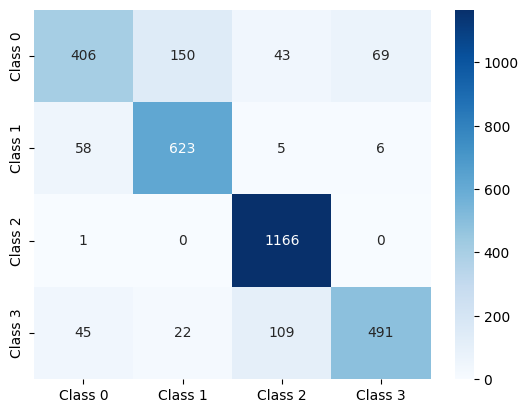

In [17]:
import matplotlib as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, pred_labels)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1", "Class 2", "Class 3"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3"])